In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 

import sys; sys.path.append('/home/mitch/school/mfl/')
import src.json_utils

In [184]:
raw = '/home/mitch/Dropbox/data/mexico_fls/raw/2005/'
interim = '/home/mitch/Dropbox/data/mexico_fls/interim2/2005/'

figs = '/home/mitch/github/mfl/fig/'
dicts= '/home/mitch/github/mfl/dicts/'

In [185]:
education = src.json_utils.load_json(dicts + 'education.json')
rename = src.json_utils.load_json(dicts + 'rename_ind_2005.json')
naics = src.json_utils.load_json(dicts + 'naics_industry.json')

In [186]:
ids = ['folio', 'ls', 'pid_link']
keep = ['folio', 'ls', 'pid_link']
os.chdir(raw + 'book IIIB/data/')
portad = pd.read_stata('iiib_portad.dta')
portad = portad.sort_values(by=['folio', 'ls'])

In [187]:
portad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20607 entries, 0 to 20606
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   catorcena  20607 non-null  float32
 1   edad       20606 non-null  float32
 2   edo_civil  20607 non-null  int8   
 3   ent        20607 non-null  float32
 4   folio      20607 non-null  object 
 5   ls         20607 non-null  object 
 6   pid_link   20607 non-null  object 
 7   rel        20607 non-null  float32
dtypes: float32(4), int8(1), object(3)
memory usage: 825.2+ KB


In [188]:
os.chdir(raw + 'book IIIA/data/')
weights_3a = pd.read_stata('weights.dta')
weights_3a = (weights_3a.query('fac_3a>0')
              .drop_duplicates()
              .sort_values(by=['folio', 'ls']))
weights_3a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19544 entries, 0 to 35087
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   folio   19544 non-null  object
 1   ls      19544 non-null  object
 2   fac_3a  19544 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 534.4+ KB


In [189]:
# ids
os.chdir(raw + 'book C/data/')
df_ls = pd.read_stata('c_ls.dta')
df_ls = df_ls.drop(columns='pid_link')

os.chdir(raw + 'book IIIA/data/')
# employment
df_tb = pd.read_stata('iiia_tb.dta')
df_tb = df_tb.drop(columns='pid_link')

# education
df_ed = pd.read_stata('iiia_ed.dta')
df_ed = df_ed.drop(columns='pid_link')

# non labor income, is ANNUAL
df_iin = pd.read_stata('iiia_iin.dta')
df_iin = df_iin.drop(columns='pid_link')

os.chdir(raw + 'book IIIB/data/')
# credit
df_cr = pd.read_stata('iiib_cr.dta')
df_cr = df_cr.drop(columns='pid_link')

# credit 1
df_cr1 = pd.read_stata('iiib_cr1.dta')
df_cr1 = df_cr1.drop(columns='pid_link')

# family structure (gender)
df_thi = pd.read_stata('iiib_thi.dta')
df_thi = df_thi.drop(columns='pid_link')

In [190]:
df = (portad.merge(weights_3a, on=['folio', 'ls'], how='left')
        .merge(df_ls, on=['folio', 'ls'], how='left')
        .merge(df_tb, on=['folio', 'ls'], how='left')
        .merge(df_ed, on=['folio', 'ls'], how='left')
        .merge(df_cr, on=['folio', 'ls'], how='left')
        .merge(df_cr1, on=['folio', 'ls'], how='left')
        .merge(df_thi, on=['folio', 'ls'], how='left')
        )

In [191]:
df = df.rename(columns=rename)
df = df[rename.values()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hhid                        21057 non-null  object 
 1   hhmember                    21057 non-null  object 
 2   weight_ind                  19464 non-null  float64
 3   is_hhm                      20986 non-null  float32
 4   age                         21056 non-null  float32
 5   attended_school             21004 non-null  float32
 6   education                   18858 non-null  float32
 7   gender                      21043 non-null  float32
 8   income_type                 6991 non-null   float64
 9   income_undetailed           5522 non-null   float32
 10  has_income_second_job       127 non-null    float32
 11  income_second_job           110 non-null    float32
 12  has_wage                    21005 non-null  object 
 13  wage                        950

In [192]:
df = df[~df.weight_ind.isna()]

# Household Size

In [193]:
# define household size
df['hh_size'] = df.groupby('hhid')['hhmember'].transform('size')

# Education

In [194]:
df['attended_school'] = df['attended_school'].replace({1.0:1.0, 3.0:0.0}).astype(bool)
df.attended_school.value_counts(dropna=False)

attended_school
True     17387
False     2077
Name: count, dtype: int64

In [195]:
education

{'1.0': 'Low',
 '2.0': 'Low',
 '3.0': 'Low',
 '4.0': 'Medium',
 '5.0': 'Medium',
 '6.0': 'Medium',
 '7.0': 'Medium',
 '8.0': 'Medium',
 '9.0': 'High',
 '10.0': 'High',
 '98.0': 'Low'}

In [196]:
df.education.value_counts(dropna=False)

education
3.0     7289
4.0     4837
6.0     2687
NaN     2081
9.0     1722
5.0      263
8.0      241
7.0      170
10.0      78
1.0       76
2.0       15
98.0       5
Name: count, dtype: int64

In [197]:
df.loc[df.attended_school == False, 'education'].value_counts()

Series([], Name: count, dtype: int64)

In [198]:
df.education = df.education.astype('str').replace(education)
df.loc[df.attended_school == False, 'education'] = 'Low'
df['education'] = pd.Categorical(df['education'], categories=['Low', 'Medium', 'High', 'nan'])
df.education.value_counts()

education
Low       9462
Medium    8198
High      1800
nan          4
Name: count, dtype: int64

# Age

In [199]:
df.age.isna().sum()

1

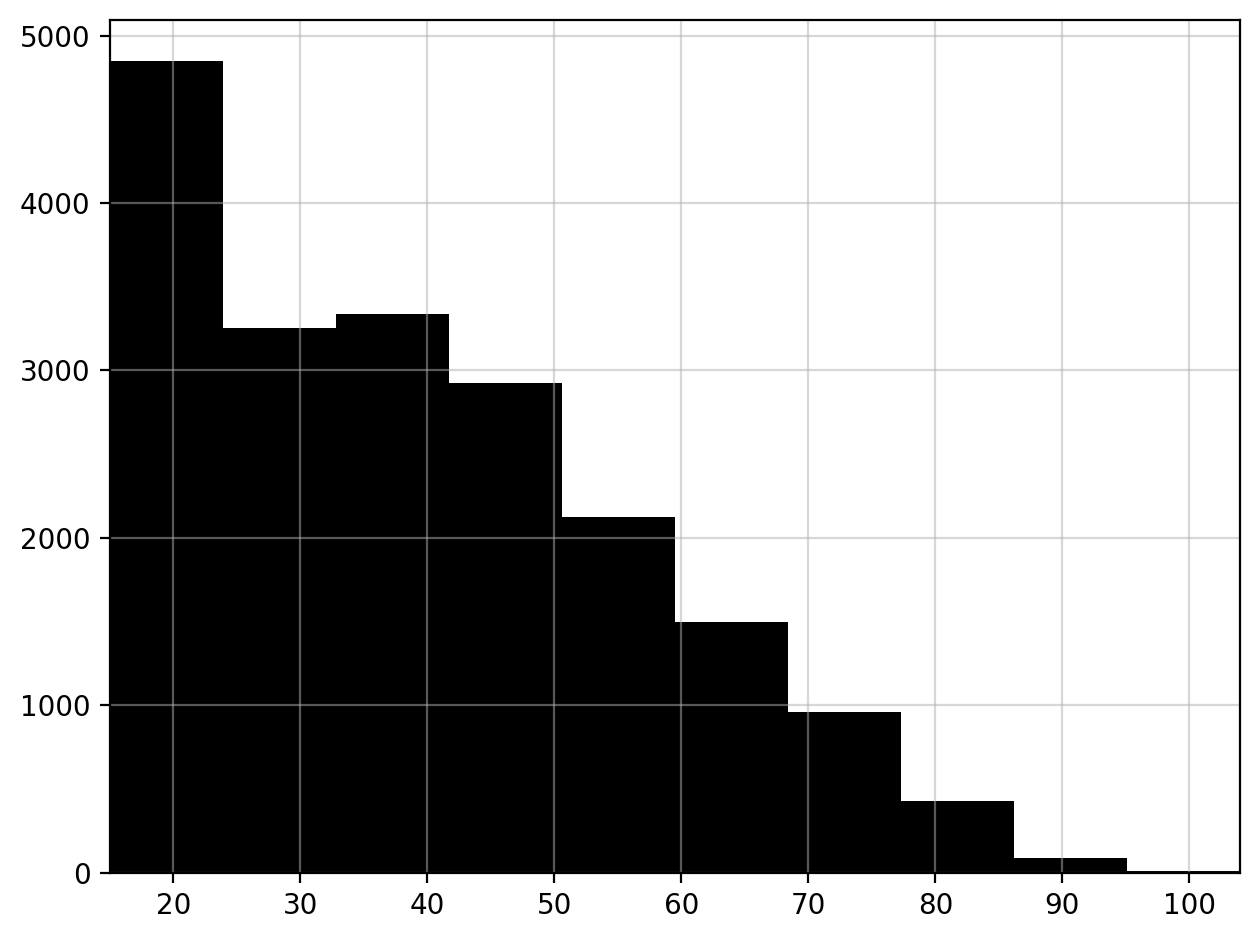

In [200]:
df.age.hist()
plt.show()

# Gender

In [201]:
df.gender.value_counts(dropna=False)

gender
1.0    10719
3.0     5188
2.0     3545
NaN       12
Name: count, dtype: int64

In [202]:
df['gender'] = df['gender'].replace(
    {1.0:'Female',
     2.0:'Male',
     3.0:'Male'}
    )
df.gender.value_counts(dropna=False)

gender
Female    10719
Male       8733
NaN          12
Name: count, dtype: int64

# Income

In [203]:
detailed_income_sources = ['wage', 'piecework', 'tips', 'extrahours', 'christmasbonus', 'bonus', 'profitdist', 'other']
has_values = {
    'wage':'A',
    'piecework':'B',
    'tips':'C',
    'extrahours':'D',
    'christmasbonus':'E',
    'bonus':'F',
    'profitdist':'H',
    'other':'M'
}

In [204]:
df.income_type.value_counts(dropna=False)

income_type
NaN    13139
3.0     5080
1.0      859
8.0      386
Name: count, dtype: int64

In [205]:
df.income_type = df.income_type.replace({
    3.0:'undetailed',
    1.0:'detailed',
    8.0:'dk'
})

In [206]:
df['income_main_job'] = 0.00

undetailed = df['income_type'] == 'undetailed'
detailed   = df['income_type'] == 'detailed'
dk_income  = df['income_type'] == 'dk'

df.loc[df.income_type == 'undetailed', 'income_main_job'] = df.loc[undetailed, 'income_undetailed']

In [207]:
for detailed_income_source in detailed_income_sources:
    knows = df['has_' + detailed_income_source] == has_values[detailed_income_source]
    dk = df['has_' + detailed_income_source] == 8

    df.loc[dk, detailed_income_source] = np.average(df.loc[knows, detailed_income_source],
                                                    weights = df.loc[knows, 'weight_ind'])

    df[detailed_income_source] = df[detailed_income_source].fillna(0.00)
df.loc[df.income_type == 'detailed', 'income_main_job'] = df.loc[detailed, detailed_income_sources].sum(axis=1)

/tmp/ipykernel_373880/937418611.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68329.63311552304' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[dk, detailed_income_source] = np.average(df.loc[knows, detailed_income_source],
/tmp/ipykernel_373880/937418611.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '387.90530076444827' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[dk, detailed_income_source] = np.average(df.loc[knows, detailed_income_source],
/tmp/ipykernel_373880/937418611.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7785.492042645729' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[dk, detailed_income_

In [208]:
knows = df['has_' + 'wage'] == has_values['wage']
np.average(df.loc[knows, 'wage'], weights=df.loc[knows, 'weight_ind'])

68329.63311552304

In [209]:
income_sources = [
    'income_main_job',
    'income_second_job',
    'income_main_business',
    'income_second_business'
]
df['income'] = df[income_sources].sum(axis=1)
df['log_income'] = np.log(df['income'])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Work Industry

In [210]:
naics

{'-1': 'None',
 '11': 'Agriculture',
 '21': 'Mining',
 '22': 'Utilities',
 '23': 'Construction',
 '31': 'Manufacturing',
 '32': 'Manufacturing',
 '33': 'Manufacturing',
 '43': 'Wholesale',
 '46': 'Retail',
 '48': 'Transportation',
 '49': 'Transportation',
 '51': 'Massive Means Information',
 '52': 'Financial / Insurance',
 '53': 'Real Estate',
 '54': 'Professional / Scientific',
 '55': 'Corporate',
 '56': 'Business Services',
 '61': 'Education',
 '62': 'Health / Social Services',
 '71': 'Cultural / Sport / Recreational',
 '72': 'Hospitality',
 '81': 'Other Services (Not Government)',
 '93': 'Government',
 '99': 'Other'}

In [211]:
df.naics_classification.fillna(-1, inplace=True)
df.naics_classification.value_counts(dropna=False)

naics_classification
-1.0     9726
 11.0    1966
 46.0    1497
 23.0     924
 31.0     806
 81.0     799
 72.0     504
 61.0     478
 33.0     427
 93.0     385
 99.0     337
 48.0     306
 32.0     259
 62.0     207
 54.0     197
 56.0     186
 43.0     105
 71.0      84
 21.0      59
 51.0      56
 52.0      55
 53.0      42
 22.0      38
 49.0      18
 55.0       3
Name: count, dtype: int64

In [212]:
df['naics_classification'] = df.naics_classification.astype(int).astype(str).replace(naics)
df.naics_classification.value_counts(dropna=False)

naics_classification
None                               9726
Agriculture                        1966
Retail                             1497
Manufacturing                      1492
Construction                        924
Other Services (Not Government)     799
Hospitality                         504
Education                           478
Government                          385
Other                               337
Transportation                      324
Health / Social Services            207
Professional / Scientific           197
Business Services                   186
Wholesale                           105
Cultural / Sport / Recreational      84
Mining                               59
Massive Means Information            56
Financial / Insurance                55
Real Estate                          42
Utilities                            38
Corporate                             3
Name: count, dtype: int64

# Debts

In [213]:
df['has_debts'] = df['has_debts'].replace(
    {1.0:1, 8.0:0}
    ).fillna(0)

no_debts = df['has_debts'] == 0
df.loc[no_debts, 'debts'] = 0.0

df['has_debts'] = (df['debts'] > 0).astype(bool)
df.has_debts.value_counts()

has_debts
False    14408
True      5056
Name: count, dtype: int64

# Loans

In [214]:
df.asked_for_loan_12mth.value_counts(dropna=False)

asked_for_loan_12mth
NaN    12476
3.0     5363
1.0     1625
Name: count, dtype: int64

In [215]:
df['asked_for_loan_12mth'] = df['asked_for_loan_12mth'].replace(
    {1.0:1, 3.0:0, np.nan:0}
)
df['asked_for_loan_12mth'] = df['asked_for_loan_12mth'].astype(bool)
df.asked_for_loan_12mth.value_counts(dropna=False)

asked_for_loan_12mth
False    17839
True      1625
Name: count, dtype: int64

In [216]:
loan_types = {
    1.0:'bank',
    2.0:'savings_fund',
    3.0:'moneylender',
    4.0:'relative',
    5.0:'friends',
    6.0:'work',
    7.0:'pawnshop',
    8.0:'verbal_agreement_credit_program',
    9.0:'other_govt',
    10.0:'other',
    -1.0: np.nan
}
df['loan_type'] = df['loan_type'].replace(loan_types)
df.loan_type.value_counts(dropna=False)

loan_type
NaN                                17841
relative                             389
friends                              316
savings_fund                         231
moneylender                          166
work                                 142
bank                                 122
other                                121
pawnshop                              99
other_govt                            28
verbal_agreement_credit_program        9
Name: count, dtype: int64

In [217]:
got_loan = df['received_loan'] == 1.0
df.loc[~got_loan, 'loan'] = 0.0

df['has_loan'] = ~df.loan_type.isna() & got_loan
df.has_loan.value_counts()

has_loan
False    17851
True      1613
Name: count, dtype: int64

In [218]:
formal = ['bank', 'savings_fund', 'moneylender', 'pawnshop']
informal = ['relative', 'friends', 'work', 'verbal_agreement_credit_program', 'other_govt', 'other']
friends_relatives = ['relative', 'friends']

df['has_loan_formal']            = df['loan_type'].isin(formal)
df['has_loan_informal']          = df['loan_type'].isin(informal)
df['has_loan_friends_relatives'] = df['loan_type'].isin(friends_relatives)

df['loan_formal']   = df['loan']*df['has_loan_formal'] 
df['loan_informal'] = df['loan']*df['has_loan_informal'] 
df['loan_friends_relatives']   = df['loan']*df['has_loan_friends_relatives'] 

# Savings

In [219]:
df.has_savings.value_counts(dropna=False)

has_savings
3.0    17042
1.0     2156
NaN      139
7.0      127
Name: count, dtype: int64

In [220]:
has_savings = df['has_savings'] == 1.0
no_savings = df['has_savings'] == 3.0
dk_savings = df['has_savings'] == 7.0

#df.loc[has_savings, 'savings'] = df.loc[df.has_savings, 'savings']
df.loc[no_savings, 'savings'] = 0.0
df.loc[dk_savings, 'savings'] = 0.0

In [221]:
df['has_savings'] = df['has_savings'].replace({
    1.0   : True,
    3.0   : False,
    7.0   : False,
    np.nan: False
})
df.has_savings.value_counts(dropna=False)

has_savings
False    17308
True      2156
Name: count, dtype: int64

In [222]:
savings_locations = {
   'has_savings_none'          : 1.0,
   'has_savings_bank'          : 2.0,
   'has_savings_coop'          : 3.0,
   'has_savings_savingsbank'   : 4.0,
   'has_savings_friend_not_hhm': 5.0,
   'has_savings_afores'        : 6.0,
   'has_savings_caja_solidaria': 7.0,
   'has_savings_house'         : 8.0,
   'has_savings_work'          : 9.0,
   'has_savings_other'         : 10.0
}

In [223]:
for savings_type in list(savings_locations.keys()):
    df[savings_type] = (df[savings_type] == savings_locations[savings_type]).astype(bool)

In [224]:
df.loc[dk_savings, list(savings_locations.keys())].sum()

has_savings_none              0
has_savings_bank              0
has_savings_coop              0
has_savings_savingsbank       0
has_savings_friend_not_hhm    0
has_savings_afores            0
has_savings_caja_solidaria    0
has_savings_house             0
has_savings_work              0
has_savings_other             0
dtype: int64

In [225]:
"""
df['has_savings_none']              = df['has_savings_none'] == 1.0
df['has_savings_bank']              = df['has_savings_bank'] == 2.0
df['has_savings_coop']              = df['has_savings_coop'] == 3.0
df['has_savings_savingsbank']       = df['has_savings_savingsbank'] == 4.0
df['has_savings_friend_not_hhm']    = df['has_savings_friend_not_hhm'] == 5.0
df['has_savings_afores']            = df['has_savings_afores'] == 6.0
df['has_savings_caja_solidaria']    = df['has_savings_caja_solidaria'] == 7.0
df['has_savings_house']             = df['has_savings_house'] == 8.0
df['has_savings_work']              = df['has_savings_work'] == 9.0
df['has_savings_other']             = df['has_savings_other'] == 10.0
"""

"\ndf['has_savings_none']              = df['has_savings_none'] == 1.0\ndf['has_savings_bank']              = df['has_savings_bank'] == 2.0\ndf['has_savings_coop']              = df['has_savings_coop'] == 3.0\ndf['has_savings_savingsbank']       = df['has_savings_savingsbank'] == 4.0\ndf['has_savings_friend_not_hhm']    = df['has_savings_friend_not_hhm'] == 5.0\ndf['has_savings_afores']            = df['has_savings_afores'] == 6.0\ndf['has_savings_caja_solidaria']    = df['has_savings_caja_solidaria'] == 7.0\ndf['has_savings_house']             = df['has_savings_house'] == 8.0\ndf['has_savings_work']              = df['has_savings_work'] == 9.0\ndf['has_savings_other']             = df['has_savings_other'] == 10.0\n"

In [226]:
# restrict to people with a well defined age
df = (df.query('age >= 20')
      .query('age <= 65')
)

In [227]:
get_sum = [
    'income',
    'savings',
    'debts'
]

get_any = [
    'has_savings',
    'has_debts', 
    'has_loan',
    'has_loan_formal',
    'has_loan_informal',
    'has_loan_friends_relatives',
    'has_savings_none',
    'has_savings_bank',
    'has_savings_coop',
    'has_savings_savingsbank',
    'has_savings_friend_not_hhm',
    'has_savings_afores',
    'has_savings_caja_solidaria',
    'has_savings_house',
    'has_savings_work',
    'has_savings_other'
]

# get sum over set of individuals in household
for var in get_sum:
    df[var] = df.groupby('hhid')[var].transform('sum')

# check if any individual in household satisfies it
for var in get_any:
    df[var] = df.groupby('hhid')[var].transform(lambda x : x.sum() > 0)

In [228]:
# create single observation for each household by restricting to household head
df = df[df['is_hhm'] == 1.0].reset_index(drop=True)

# Income Outliers

In [229]:
from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['income'], df['weight_ind']).quantile(0.995).iloc[0]
df = df[df['income'] < q_995]

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7f8e08168040> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)


In [230]:
os.chdir(interim)
df.to_csv('ind_2005.csv', index=False)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5089 entries, 0 to 5111
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   hhid                        5089 non-null   object  
 1   hhmember                    5089 non-null   object  
 2   weight_ind                  5089 non-null   float64 
 3   is_hhm                      5089 non-null   float32 
 4   age                         5089 non-null   float32 
 5   attended_school             5089 non-null   bool    
 6   education                   5089 non-null   category
 7   gender                      5089 non-null   object  
 8   income_type                 2592 non-null   object  
 9   income_undetailed           2054 non-null   float32 
 10  has_income_second_job       54 non-null     float32 
 11  income_second_job           45 non-null     float32 
 12  has_wage                    5087 non-null   object  
 13  wage                   